In [1]:
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms
import torch.optim as optim
from efficientnet_pytorch import EfficientNet
from trainer import train_model
from pathlib import Path
import numpy as np
import argparse
import os
from PIL import Image
import torchvision.models as models
import torchvision.transforms.functional as TF

In [13]:
import pandas as pd

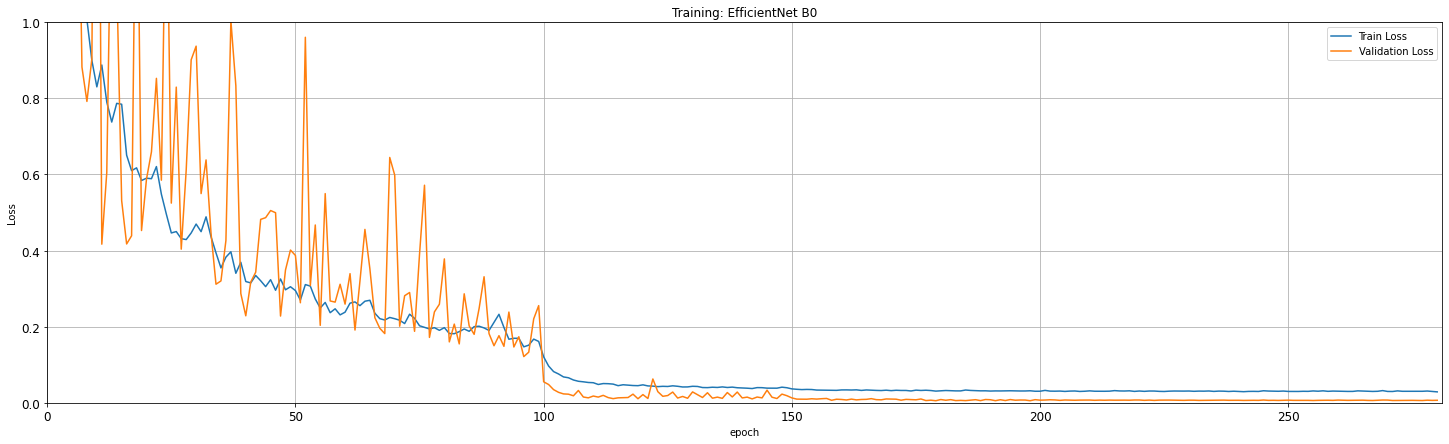

In [86]:
import matplotlib.pyplot as plt
adam_df = pd.read_csv("./results_adam/training_info.csv")
ax = adam_df[['train_loss', 'val_loss']].plot(title='Training: EfficientNet B0', figsize=(25, 7), fontsize=12, grid=True)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim([0, 1])
ax.set_xlim([0, len(adam_df)])
plt.legend(["Train Loss", "Validation Loss"], loc=0)

<AxesSubplot:>

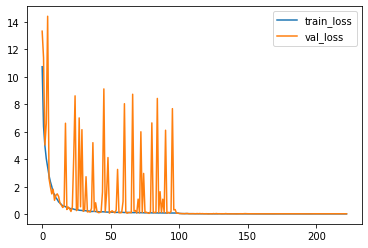

In [15]:
sgd_df = pd.read_csv("./results_sgd/training_info.csv")
sgd_df[['train_loss', 'val_loss']].plot()

In [22]:
import time
def get_training_time(df):
    total_time = df.train_time.sum() + df.val_time.sum()
    ty_res = time.gmtime(total_time)
    return time.strftime("%H:%M:%S",ty_res)
print("Total Training Time SGD:", get_training_time(sgd_df))
print("Total Training Time Adam:", get_training_time(adam_df))

Total Training Time SGD: 13:46:03
Total Training Time Adam: 17:23:46


In [47]:
train_labels = open("./data/train.txt", "r").readlines()
test_labels = open("./data/test.txt", "r").readlines()
train_labels = [float(l.replace('\n', '')) for l in train_labels]
test_labels = [float(l.replace('\n', '')) for l in test_labels]

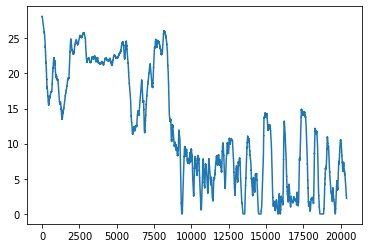

In [48]:
plt.plot([i for i in range(len(train_labels))], train_labels)

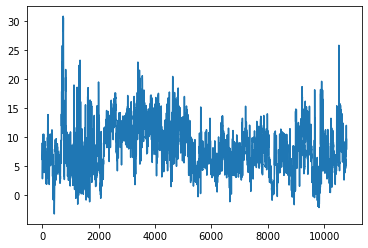

In [51]:
t = test_labels
plt.plot([i for i in range(len(t))], t)

In [60]:
help(ax)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      Parameters
 |      ----------
 |      fig : `matplotlib.figure.Figure`
 |      
 |      *args : tuple (*nrows*, *ncols*, *index*) or int
 |          The array of subplots in the figure has dimensions ``(nrows,
 |          ncols)``, and *index* is the index of the subplot being created.
 |          *index* starts at 1 in the upper left corner and increases to the
 |          right.
 |      
 |          If *nrows*, *ncols*, and *index* are all single digit numbers, then
 |          *args* can be passed as a single 3-digit number 